## Import libraries

In [1]:
import pandas as pd
import numpy as np
from rdkit.Chem import Descriptors, Lipinski
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
from common import mannwhitney

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
%matplotlib inline
%config InlineBackend.figure_format='retina'

## Statistical analysis of active and inactive classes

**Interpretation of Statistical Results**  

_**Box Plots**_


_**pIC50 values**_  
Taking a look at **pIC<sub>50</sub>** values, the **actives** and **inactives** displayed _**statistically significant difference**_, which is to be expected since threshold values (**pIC<sub>50</sub>** < 1,000 nM = **actives** while **pIC<sub>50</sub>** > 10,000 nM = **inactives**, corresponding to **pIC<sub>50</sub>** > 6 = **actives** and **pIC<sub>50</sub>** < 5 = **inactives**) were used to define actives and inactives.

_**Lipinski's descriptors**_  
Of the 4 Lipinski's descriptors _**no statistically significant difference**_ was observed between **actives** and **inactives**.

In [2]:
tidy_target_HepG2_3classes = pd.read_csv('./data/tidy_target_HepG2_3classes.csv')
tidy_target_HepG2_3classes.head()

,molecule_chembl_id,cleaned_canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL39380,COC(=O)CC(O)CP(=O)([O-])CCc1c(Cl)cc(Cl)cc1OCc1...,active,460.270,3.6773,1.0,6.0,7.0
1,CHEMBL39003,CC(C)(C)C(=O)OCOC(=O)CC(O)CP(=O)(CCc1c(Cl)cc(C...,active,675.539,6.7974,1.0,10.0,7.0
2,CHEMBL39102,O=C(O)C[C@H](O)CP(=O)(O)CCc1c(Cl)cc(Cl)cc1OCc1...,active,447.251,4.2209,3.0,4.0,6.0
3,CHEMBL162083,O=S(=O)(CC#C/C=C\C#CCO)c1ccccc1,active,260.314,1.0156,1.0,3.0,8.0
4,CHEMBL350898,COc1ccc(S(=O)(=O)CC#C/C=C\C#CCO)cc1,active,290.340,1.0242,1.0,4.0,8.0


In [3]:
tidy_target_HepG2_2classes = tidy_target_HepG2_3classes.loc[tidy_target_HepG2_3classes["bioactivity_class"] != "intermediate"]
tidy_target_HepG2_2classes.head()

,molecule_chembl_id,cleaned_canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL39380,COC(=O)CC(O)CP(=O)([O-])CCc1c(Cl)cc(Cl)cc1OCc1...,active,460.270,3.6773,1.0,6.0,7.0
1,CHEMBL39003,CC(C)(C)C(=O)OCOC(=O)CC(O)CP(=O)(CCc1c(Cl)cc(C...,active,675.539,6.7974,1.0,10.0,7.0
2,CHEMBL39102,O=C(O)C[C@H](O)CP(=O)(O)CCc1c(Cl)cc(Cl)cc1OCc1...,active,447.251,4.2209,3.0,4.0,6.0
3,CHEMBL162083,O=S(=O)(CC#C/C=C\C#CCO)c1ccccc1,active,260.314,1.0156,1.0,3.0,8.0
4,CHEMBL350898,COc1ccc(S(=O)(=O)CC#C/C=C\C#CCO)cc1,active,290.340,1.0242,1.0,4.0,8.0


**pIC50**

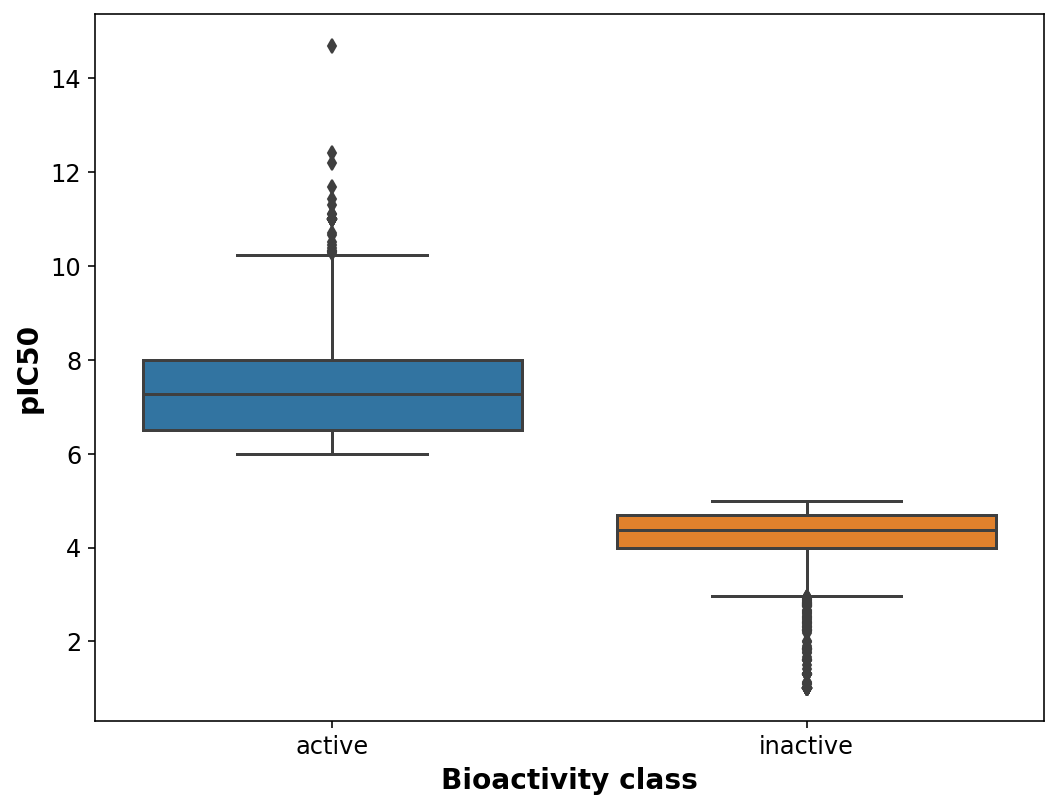

In [4]:
plt.figure(figsize=(8.5, 6.5))
sns.boxplot(x='bioactivity_class', y='pIC50', data=tidy_target_HepG2_2classes)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50', fontsize=14, fontweight='bold')
plt.show()

In [5]:
tidy_target_HepG2_2classes.pipe(mannwhitney, descriptor='pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,0.0,0.0,0.05,Different distribution (reject H0)


**MW**

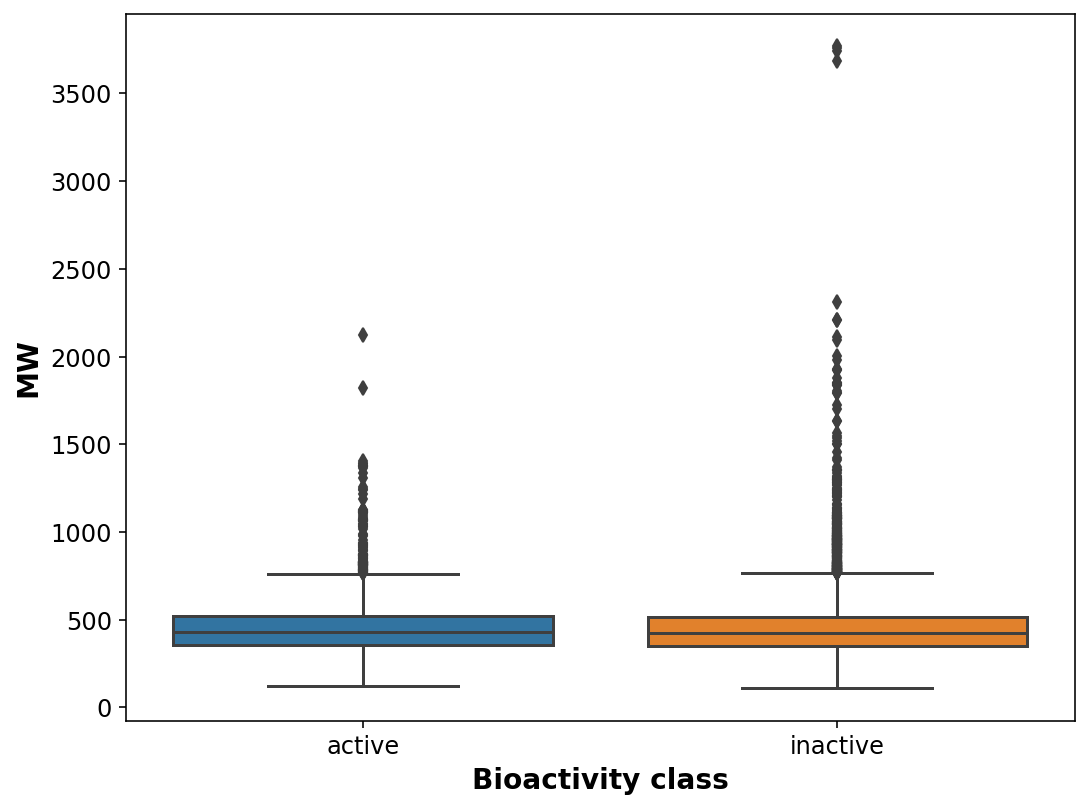

In [6]:
plt.figure(figsize=(8.5, 6.5))
sns.boxplot(x='bioactivity_class', y='MW', data=tidy_target_HepG2_2classes)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')
plt.show()

In [7]:
tidy_target_HepG2_2classes.pipe(mannwhitney, descriptor='MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,17126143.5,0.096305,0.05,Same distribution (fail to reject H0)


**LogP**

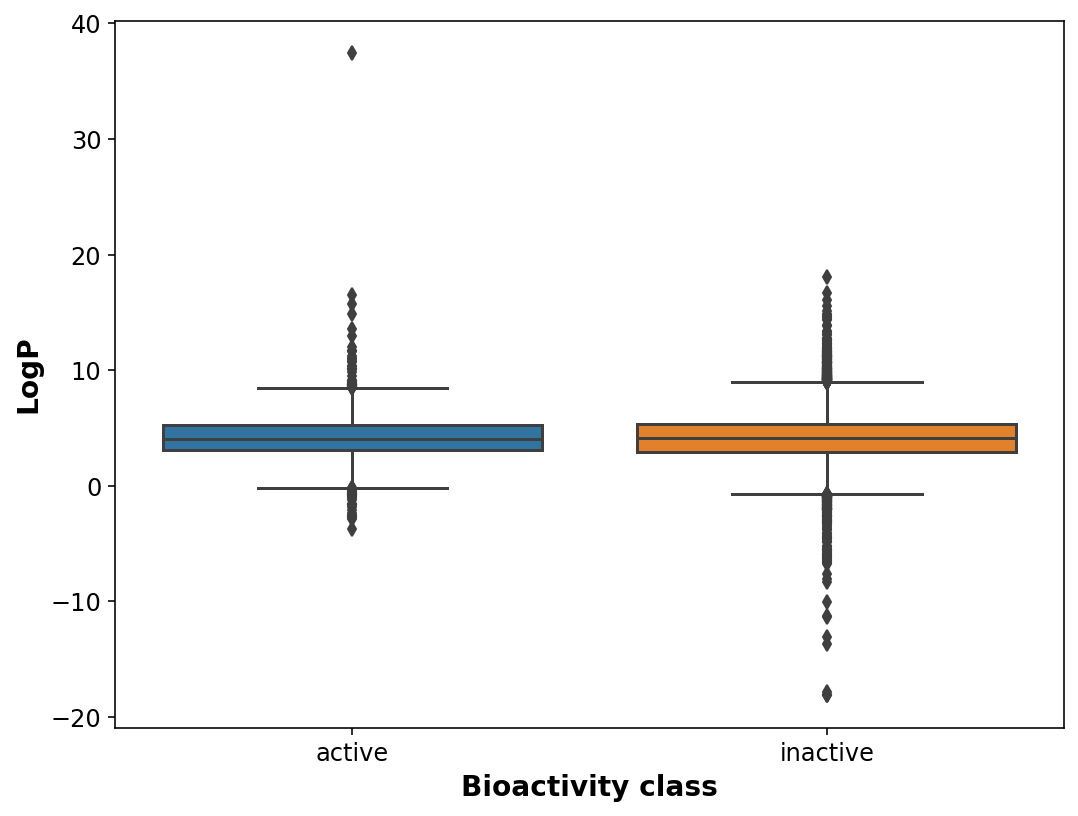

In [8]:
plt.figure(figsize=(8.5, 6.5))
sns.boxplot(x='bioactivity_class', y='LogP', data=tidy_target_HepG2_2classes)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.show()

In [9]:
tidy_target_HepG2_2classes.pipe(mannwhitney, descriptor='LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,17299179.5,0.326914,0.05,Same distribution (fail to reject H0)


**NumHDonors**

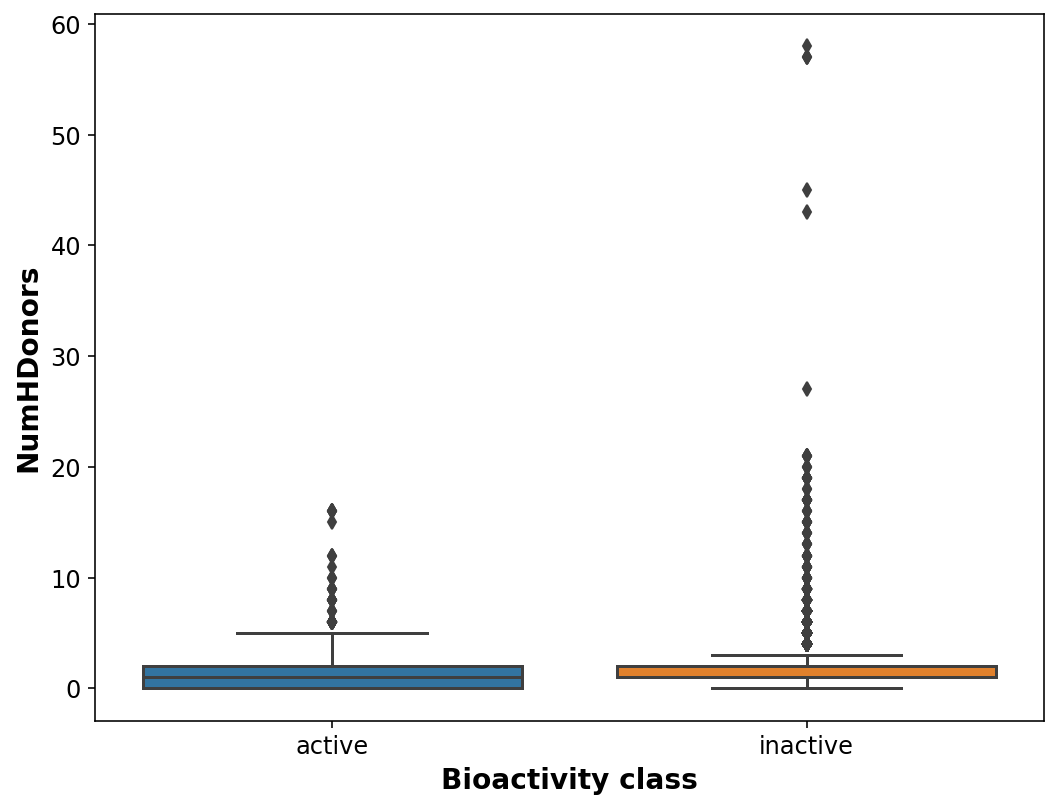

In [10]:
plt.figure(figsize=(8.5, 6.5))
sns.boxplot(x='bioactivity_class', y='NumHDonors', data=tidy_target_HepG2_2classes)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')
plt.show()

In [11]:
tidy_target_HepG2_2classes.pipe(mannwhitney, descriptor='NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,15951127.0,1.245809e-13,0.05,Different distribution (reject H0)


**NumHAcceptors**

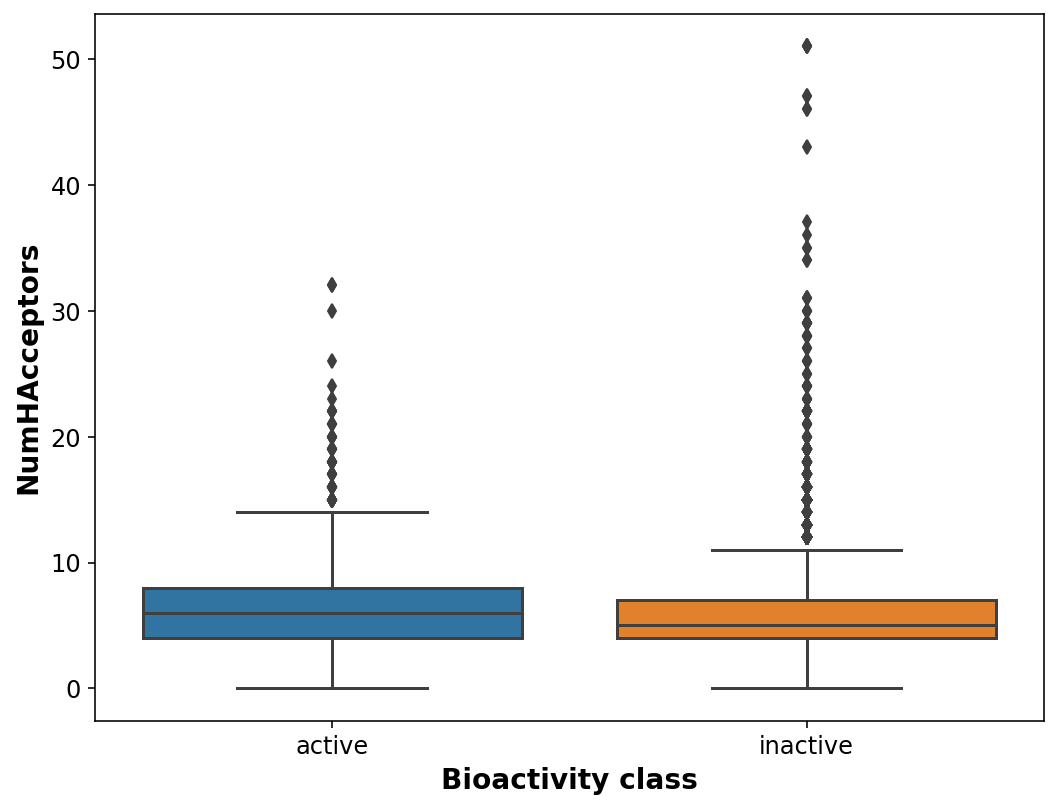

In [12]:
plt.figure(figsize=(8.5, 6.5))
sns.boxplot(x='bioactivity_class', y='NumHAcceptors', data=tidy_target_HepG2_2classes)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')
plt.show()

In [13]:
tidy_target_HepG2_2classes.pipe(mannwhitney, descriptor='NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,16802731.0,0.00174,0.05,Different distribution (reject H0)


In [14]:
mann_whitney = pd.concat([tidy_target_HepG2_2classes.pipe(mannwhitney, descriptor='pIC50'),
                          tidy_target_HepG2_2classes.pipe(mannwhitney, descriptor='MW'),
                          tidy_target_HepG2_2classes.pipe(mannwhitney, descriptor='LogP'),
                          tidy_target_HepG2_2classes.pipe(mannwhitney, descriptor='NumHDonors'),
                          tidy_target_HepG2_2classes.pipe(mannwhitney, descriptor='NumHAcceptors')
                         ]).reset_index(drop=True)
mann_whitney

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,0.0,0.000000e+00,0.05,Different distribution (reject H0)
1,MW,17126143.5,9.630516e-02,0.05,Same distribution (fail to reject H0)
2,LogP,17299179.5,3.269139e-01,0.05,Same distribution (fail to reject H0)
3,NumHDonors,15951127.0,1.245809e-13,0.05,Different distribution (reject H0)
4,NumHAcceptors,16802731.0,1.740157e-03,0.05,Different distribution (reject H0)
